--- Starting Spambase Dataset Analysis ---

Spambase: Train/Test split complete. Train: 3220 samples, Test: 1381 samples.
Spambase PCA: Explained variance ratio of 2 components: 17.49%

--- Training Classical Linear SVM for Spambase ---
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Spambase: Best C parameter: 10

-- Evaluating Classical Linear SVM on Spambase Dataset ---
Training Accuracy: 0.8689
Test Accuracy: 0.8682
Precision: 0.8649
Recall: 0.7886
F1-Score: 0.8250
Generalization Gap: 0.0007


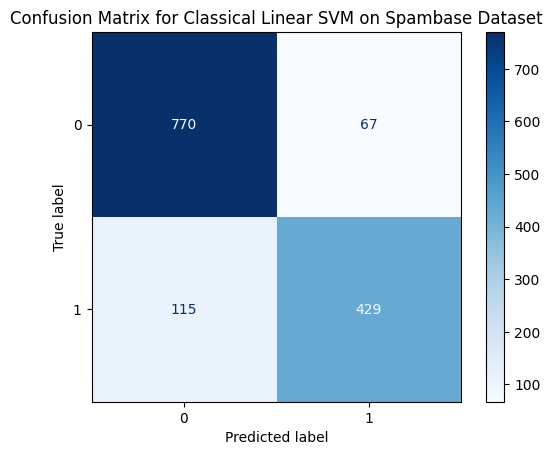


--- Starting Lung Cancer Dataset Analysis ---

Lung Cancer Dataset loaded successfully!
First 5 rows of the Lung Cancer dataset:
   label  attr_1  attr_2  attr_3  attr_4  attr_5  attr_6  attr_7  attr_8  \
0      1       0       3       0     NaN       0       2       2       2   
1      1       0       3       3     1.0       0       3       1       3   
2      1       0       3       3     2.0       0       3       3       3   
3      1       0       2       3     2.0       1       3       3       3   
4      1       0       3       2     1.0       1       3       3       3   

   attr_9  ...  attr_47  attr_48  attr_49  attr_50  attr_51  attr_52  attr_53  \
0       1  ...        2        2        2        2        2        1        1   
1       1  ...        2        2        2        2        2        2        2   
2       1  ...        2        2        2        2        2        2        2   
3       1  ...        2        2        2        2        2        2        2   
4       

C:\Users\User\AppData\Local\Temp\ipykernel_25576\3979240309.py:169: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  lung_cancer_df[col].fillna(mode_val, inplace=True)


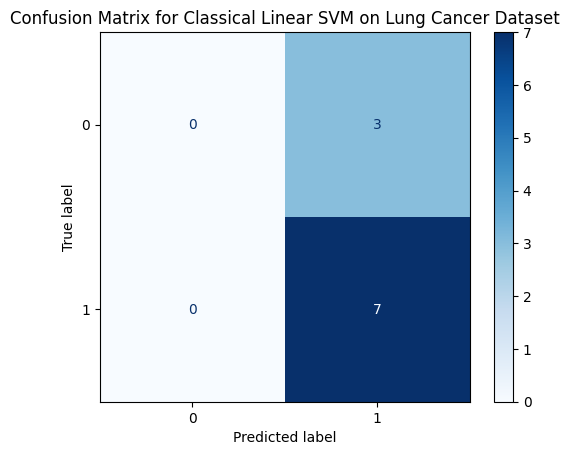


--- Classical Linear SVM Experiments Complete ---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC # Using SVC with linear kernel for Linear SVM
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

# Set a random state for reproducibility accross all splits and PCA
# Basically suruh start from position #42 gitu
RANDOM_STATE = 42 # To control the randomness if not evaluation metrics lain value or train on different dataset
TEST_SIZE = 0.3 # 30% for testing, 70% for training
N_COMPONENTS_PCA = 2 # as stated in proposal
# For C parameter tuning, a logarithmic scale is often good.
C_PARAMS = [0.01, 0.1, 1, 10, 100] # just a wide range of possible values

def evaluate_model(model, X_train, y_train, X_test, y_test, model_name, dataset_name):
    """
    Trains, predicts, evaluates a given model, and plots confusion matrix.
    """
    print(f"\n-- Evaluating {model_name} on {dataset_name} ---")

    # X_train → training data (features)
    # y_train → training labels
    # X_test → test data (features)
    # y_test → test labels
    # Predict on training set to calculate generalization gap
    # first train to solve problems
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)

    # Predict on test set
    # Then this is basically testing the model
    y_test_pred = model.predict(X_test)

    # Calculate metrics
    test_accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='binary') # 'binary' for binary classification
    recall = recall_score(y_test, y_test_pred, average='binary')
    f1 = f1_score(y_test, y_test_pred, average='binary')
    generalization_gap = abs(train_accuracy - test_accuracy)

    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"Generalization Gap: {generalization_gap:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name} on {dataset_name}')
    plt.show()

    return {
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Generalization Gap': generalization_gap
    }

# --- Spambase Dataset Implementation ---
print("--- Starting Spambase Dataset Analysis ---")

# Define Spambase Column Names
spambase_columns = [
    "word_freq_make", "word_freq_address", "word_freq_all", "word_freq_3d",
    "word_freq_our", "word_freq_over", "word_freq_remove", "word_freq_internet",
    "word_freq_order", "word_freq_mail", "word_freq_receive", "word_freq_will",
    "word_freq_people", "word_freq_report", "word_freq_addresses", "word_freq_free",
    "word_freq_business", "word_freq_email", "word_freq_you", "word_freq_credit",
    "word_freq_your", "word_freq_font", "word_freq_000", "word_freq_money",
    "word_freq_hp", "word_freq_hpl", "word_freq_george", "word_freq_650",
    "word_freq_lab", "word_freq_labs", "word_freq_telnet", "word_freq_857",
    "word_freq_data", "word_freq_415", "word_freq_85", "word_freq_technology",
    "word_freq_1999", "word_freq_parts", "word_freq_pm", "word_freq_direct",
    "word_freq_cs", "word_freq_meeting", "word_freq_original", "word_freq_project",
    "word_freq_re", "word_freq_edu", "word_freq_table", "word_freq_conference",
    "char_freq_;", "char_freq_(", "char_freq_[", "char_freq_!", "char_freq_$",
    "char_freq_#", "capital_run_length_average", "capital_run_length_longest",
    "capital_run_length_total",
    "label"
]

# Load Spambase Dataset
spambase_file_path = r'C:\Users\User\Documents\MyProjects\FYP_ResearchProject\data\spambase\spambase.data'
spambase_df = pd.read_csv(spambase_file_path, header=None, names=spambase_columns)

# Separate Features (X) and Target (y) for Spambase
X_spambase = spambase_df.drop('label', axis=1)
y_spambase = spambase_df['label']

# Data Splitting for Spambase
X_train_spambase, X_test_spambase, y_train_spambase, y_test_spambase = train_test_split(
    X_spambase, y_spambase, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y_spambase
)
print(f"\nSpambase: Train/Test split complete. Train: {len(X_train_spambase)} samples, Test: {len(X_test_spambase)} samples.")

# Scaling Features for Spambase
scaler_spambase = StandardScaler()
X_train_spambase_scaled = scaler_spambase.fit_transform(X_train_spambase)
X_test_spambase_scaled = scaler_spambase.transform(X_test_spambase)

# PCA for Spambase (as mentioned in methodology, though SVM can handle high-D)
# This PCA is specifically to prepare data for the *future* QSVM.
# For Linear SVM itself, PCA might not always improve performance directly, but it's part of your unified preprocessing.
pca_spambase = PCA(n_components=N_COMPONENTS_PCA, random_state=RANDOM_STATE)
X_train_spambase_pca = pca_spambase.fit_transform(X_train_spambase_scaled)
X_test_spambase_pca = pca_spambase.transform(X_test_spambase_scaled)

print(f"Spambase PCA: Explained variance ratio of {N_COMPONENTS_PCA} components: {np.sum(pca_spambase.explained_variance_ratio_)*100:.2f}%")


# --- Classical Linear SVM for Spambase ---
print("\n--- Training Classical Linear SVM for Spambase ---")
# Using SVC with kernel='linear' as it offers more options for linear classification
# Note: LinearSVC is an alternative optimized for linear kernels on large datasets.
# For consistency with QSVM's kernel approach, SVC(kernel='linear') is often preferred for comparison.
svm_spambase = SVC(kernel='linear', random_state=RANDOM_STATE)

# Hyperparameter tuning for C
param_grid_spambase = {'C': C_PARAMS}
grid_search_spambase = GridSearchCV(svm_spambase, param_grid_spambase, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_spambase.fit(X_train_spambase_pca, y_train_spambase) # Use PCA data for consistency with QSVM path

best_svm_spambase = grid_search_spambase.best_estimator_
print(f"Spambase: Best C parameter: {grid_search_spambase.best_params_['C']}")

# Evaluate the best model on Spambase
spambase_metrics = evaluate_model(
    best_svm_spambase,
    X_train_spambase_pca, y_train_spambase,
    X_test_spambase_pca, y_test_spambase,
    "Classical Linear SVM", "Spambase Dataset"
)


# --- Lung Cancer Dataset Implementation ---
print("\n--- Starting Lung Cancer Dataset Analysis ---")

# Define Lung Cancer Column Names
lung_cancer_column_names = ['label'] + [f'attr_{i}' for i in range(1, 57)]

# Load Lung Cancer Dataset
lung_cancer_file_path = r'C:\Users\User\Documents\MyProjects\FYP_ResearchProject\data\lung+cancer\lung-cancer.data'
try:
    lung_cancer_df = pd.read_csv(lung_cancer_file_path, header=None, names=lung_cancer_column_names, na_values=['?'])
    print("\nLung Cancer Dataset loaded successfully!")
    print("First 5 rows of the Lung Cancer dataset:")
    print(lung_cancer_df.head())
except FileNotFoundError:
    print(f"Error: The file '{lung_cancer_file_path}' was not found. Please ensure 'lung-cancer.data' is in the specified location.")
    exit()
except Exception as e:
    print(f"An error occurred during loading: {e}")
    print("Please check your file format (delimiter, missing value representation) and adjust pd.read_csv parameters accordingly.")
    exit()

# Handle Missing Values (Mode Imputation)
for col in ['attr_4', 'attr_38']: # These correspond to original attributes 5 and 39
    if lung_cancer_df[col].isnull().any():
        mode_val = lung_cancer_df[col].mode()[0]
        lung_cancer_df[col].fillna(mode_val, inplace=True)
        print(f"Missing values in '{col}' imputed with mode: {mode_val}")

print(f"Total missing values after imputation (Lung Cancer): {lung_cancer_df.isnull().sum().sum()}")

# Separate Features (X) and Target (y) for Lung Cancer
X_lung = lung_cancer_df.drop('label', axis=1)
y_lung = lung_cancer_df['label']

# Convert nominal features to float if they aren't already (important for scaling/PCA)
X_lung = X_lung.astype(float)

# Target Variable Binarization (Lung Cancer)
# Map Class 1 to 0, and Classes 2 & 3 to 1
y_lung_binary = y_lung.apply(lambda x: 0 if x == 1 else 1)
print("\nLung Cancer: Original vs Binary target distribution:")
print("Original:", y_lung.value_counts())
print("Binary:", y_lung_binary.value_counts())


# Data Splitting for Lung Cancer
# Use stratify=y_lung_binary because of the small dataset size and potential imbalance
X_train_lung, X_test_lung, y_train_lung_binary, y_test_lung_binary = train_test_split(
    X_lung, y_lung_binary, test_size=TEST_SIZE, random_state=RANDOM_STATE, stratify=y_lung_binary
)
print(f"\nLung Cancer: Train/Test split complete. Train: {len(X_train_lung)} samples, Test: {len(X_test_lung)} samples.")

# Scaling Features for Lung Cancer
scaler_lung = StandardScaler()
X_train_lung_scaled = scaler_lung.fit_transform(X_train_lung)
X_test_lung_scaled = scaler_lung.transform(X_test_lung)

# PCA for Lung Cancer
pca_lung = PCA(n_components=N_COMPONENTS_PCA, random_state=RANDOM_STATE)
X_train_lung_pca = pca_lung.fit_transform(X_train_lung_scaled)
X_test_lung_pca = pca_lung.transform(X_test_lung_scaled)

print(f"Lung Cancer PCA: Explained variance ratio of {N_COMPONENTS_PCA} components: {np.sum(pca_lung.explained_variance_ratio_)*100:.2f}%")


# --- Classical Linear SVM for Lung Cancer ---
print("\n--- Training Classical Linear SVM for Lung Cancer ---")
svm_lung = SVC(kernel='linear', random_state=RANDOM_STATE)

# Hyperparameter tuning for C
param_grid_lung = {'C': C_PARAMS}
grid_search_lung = GridSearchCV(svm_lung, param_grid_lung, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search_lung.fit(X_train_lung_pca, y_train_lung_binary) # Use PCA data

best_svm_lung = grid_search_lung.best_estimator_
print(f"Lung Cancer: Best C parameter: {grid_search_lung.best_params_['C']}")

# Evaluate the best model on Lung Cancer
lung_cancer_metrics = evaluate_model(
    best_svm_lung,
    X_train_lung_pca, y_train_lung_binary,
    X_test_lung_pca, y_test_lung_binary,
    "Classical Linear SVM", "Lung Cancer Dataset"
)

print("\n--- Classical Linear SVM Experiments Complete ---")

